# PsrPopPy analysis
### Based on the discoveries yielded by MGPS-L so far, there was a need to revisit the simulations.

Strategy:

1. Redo the simulations by giving the actual pointings observed so far as an initial constraint (Done)
2. Supply actual beam tiling applied. (Done)
3. Rework the SNR based on : (Modelled the psf as 2D Gaussian)


      a) calculation of offset from the actual psf of the snr degradation 
      
      b) Replace this value with the old offset degradation factor
      
      c) Check if new pulsar SNR > SNR limit . If so, keep the discovery

In [1]:
#True psf work in progress

## Some stats 
### 1. Canonical pulsars

In [1]:
import glob
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    f.close()    
    return i + 1 

In [3]:
# Number of discoveries based on pointing constraints alone
rd1_numbers=[]
rd1_discovery_files = glob.glob('canonical_discovery_files_round1/*.discoveries')

for rd1_file in rd1_discovery_files:
    rd1_numbers.append(file_len(rd1_file))
    
print('Average number of discoveries based on pointing constraint alone {} +/- {}'.format(np.mean(np.array(rd1_numbers)), np.std(np.array(rd1_numbers))))

Average number of discoveries based on pointing constraint alone 484.84158415841586 +/- 25.066933239726346


In [4]:
# Number of discoveries based on pointing + beam constraints accounting for 2D Gaussian modelling of synthesised beam
rd2_numbers=[]
rd2_discovery_files = glob.glob('true_canonical_discoveries/*.txt')

for rd2_file in rd2_discovery_files:
    rd2_numbers.append(file_len(rd2_file))
    
print('True number of discoveries expected {} +/- {}'.format(np.mean(np.array(rd2_numbers)), np.std(np.array(rd2_numbers))))

True number of discoveries expected 155.37623762376236 +/- 12.487499876727036


In [5]:
# Number of discoveries based on pointing constraints alone
rd1_numbers=[]
rd1_discovery_files = glob.glob('msp_discovery_round1/*.discoveries')

for rd1_file in rd1_discovery_files:
    rd1_numbers.append(file_len(rd1_file))
    
print('Average number of discoveries based on pointing constraint alone {} +/- {}'.format(np.mean(np.array(rd1_numbers)), np.std(np.array(rd1_numbers))))

Average number of discoveries based on pointing constraint alone 32.25 +/- 5.8934671073532385


In [6]:
# Number of discoveries based on pointing + beam constraints accounting for 2D Gaussian modelling of synthesised beam
rd2_numbers=[]
rd2_discovery_files = glob.glob('true_msp_discoveries/*.txt')

for rd2_file in rd2_discovery_files:
    rd2_numbers.append(file_len(rd2_file))
    
print('True number of discoveries expected {} +/- {}'.format(np.mean(np.array(rd2_numbers)), np.std(np.array(rd2_numbers))))

True number of discoveries expected 10.931818181818182 +/- 3.550913629378471


#### Period and DM distributions  

In [10]:
spin_periods=[]
dms=[]
final_snrs=[]    

In [11]:
rd2_discovery_files = glob.glob('true_canonical_discoveries/*.txt')
for rd2_file in rd2_discovery_files:
    with open(rd2_file) as f:
        for i, l in enumerate(f):
            spin_periods.append((literal_eval(l)[0]))
            dms.append((literal_eval(l)[1]))
            final_snrs.append((literal_eval(l)[-1]))
            
            
            

Text(0.5, 1.0, 'Spin periods of true discoveries across all populations')

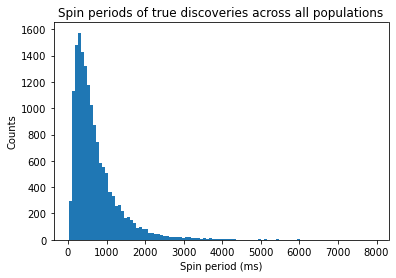

In [12]:
plt.hist(spin_periods,bins=100)
plt.xlabel('Spin period (ms)')
plt.ylabel('Counts')
plt.title('Spin periods of true discoveries across all populations')

Text(0.5, 1.0, 'DM of true discoveries across all populations')

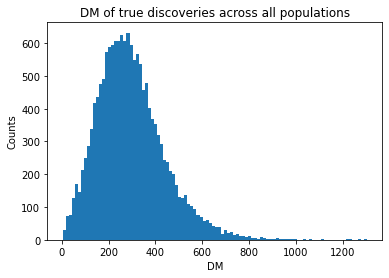

In [13]:
plt.hist(dms,bins=100)
plt.xlabel('DM')
plt.ylabel('Counts')
plt.title('DM of true discoveries across all populations')

Text(0.5, 1.0, 'SNR of true discoveries across all populations')

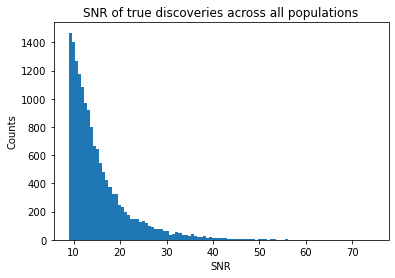

In [14]:
plt.hist(final_snrs, bins=100)
plt.xlabel('SNR')
plt.ylabel('Counts')
plt.title('SNR of true discoveries across all populations')

In [18]:
no_of_pops = len(rd2_discovery_files)
print ("Average number of pulsars expected for SNR threshold of 12.5 is: {}".format(int(sum(0.7*np.array(final_snrs) > 10)/(no_of_pops))))

Average number of pulsars expected for SNR threshold of 12.5 is: 64


Assuming a search efficiency factor of 0.7 based on Morello et al. 2020, we check the number of pulsars detected for different SNR thresholds

In [16]:
snr_thresholds = np.arange(9,60,1)
N_pulsars = [sum(0.7*np.array(final_snrs) > t)/(no_of_pops) for t in snr_thresholds]

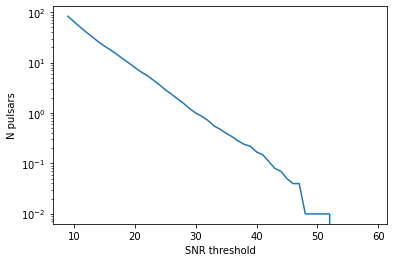

In [17]:
plt.plot(snr_thresholds, N_pulsars)
plt.xlabel('SNR threshold')
plt.ylabel('N pulsars')
plt.yscale('log')
#plt.xscale('log')

### MSPs

In [19]:
msp_snrs=[]
msp_dms=[]
msp_periods=[]

In [20]:
rd2_discovery_files = glob.glob('true_msp_discoveries/*.txt')
for rd2_file in rd2_discovery_files:
    with open(rd2_file) as f:
        for i, l in enumerate(f):
            msp_periods.append((literal_eval(l)[0]))
            msp_dms.append((literal_eval(l)[1]))
            msp_snrs.append((literal_eval(l)[-1]))

Text(0.5, 1.0, 'Spin periods of true discoveries across all MSP populations')

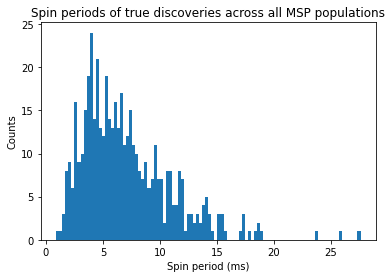

In [21]:
plt.hist(msp_periods,bins=100)
plt.xlabel('Spin period (ms)')
plt.ylabel('Counts')
plt.title('Spin periods of true discoveries across all MSP populations')

Text(0.5, 1.0, 'DMs of true discoveries across all MSP populations')

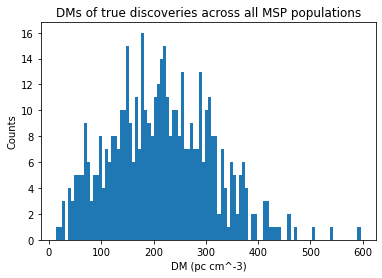

In [22]:
plt.hist(msp_dms,bins=100)
plt.xlabel('DM (pc cm^-3)')
plt.ylabel('Counts')
plt.title('DMs of true discoveries across all MSP populations')

Text(0.5, 1.0, 'SNR of true discoveries across all MSP populations')

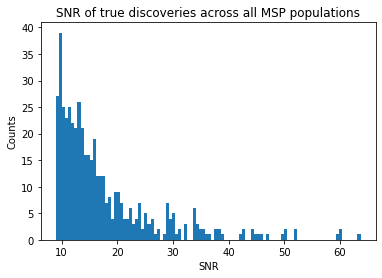

In [23]:
plt.hist(msp_snrs, bins=100)
plt.xlabel('SNR')
plt.ylabel('Counts')
plt.title('SNR of true discoveries across all MSP populations')

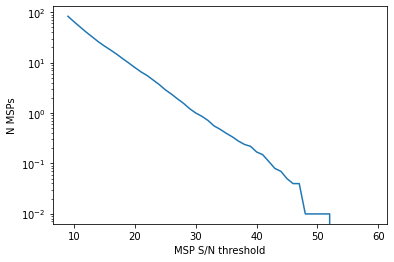

In [24]:
msp_snr_thresholds = np.arange(9,60,1)
no_of_msp_pops = len(rd2_discovery_files)
N_msps = [sum(0.8*np.array(final_snrs) > t)/(no_of_pops) for t in snr_thresholds]

plt.plot(snr_thresholds, N_pulsars)
plt.xlabel('MSP S/N threshold')
plt.ylabel('N MSPs')
plt.yscale('log')


In [26]:
sum(0.85*np.array(msp_snrs) > 9)/no_of_msp_pops

8.931818181818182

### Comparison of Period and DM distributions for MSPs and Canonical pulsars

In [191]:
!pwd

/Users/prajwalvp/MPIfR/work/MGPS/latest_psr_simulations


In [192]:
!ls

2021-10-15T17:01:57_beam_107.png    msp_discoveries
MGPS-L_all_pointing_coordinates.txt msp_discovery_round1
MGPS_Discoveries.csv                new_simulations
Simulations revisited.ipynb         old_simulations
canonical_discovery_files_round1    procedure
catalog_match.py                    sim_to_psf_weighter.py
discovery_decider.py                true_canonical_discoveries
lorimer_2015_56_msps.txt            true_msp_discoveries


In [198]:
with open('MGPS_Discoveries.csv','r') as f:
    data=f.readlines()
f.close()    

In [218]:
mgps_msp_periods = []
mgps_msp_dms=[]
mgps_canonical_periods = []
mgps_canonical_dms=[]

for i in range(1,len(data)):
    if 'J1' not in data[i].split(',')[0] or '?' in data[i].split(',')[1]:
        continue
    if float(data[i].split(',')[1]) < 0.03 and 'J' in data[i].split(',')[0]:
        mgps_msp_periods.append(data[i].split(',')[1])
        mgps_msp_dms.append(data[i].split(',')[2])
    else:
        mgps_canonical_periods.append(data[i].split(',')[1])
        mgps_canonical_dms.append(data[i].split(',')[2])

Text(0.5, 1.0, 'Spin periods of MGPS-L MSPs')

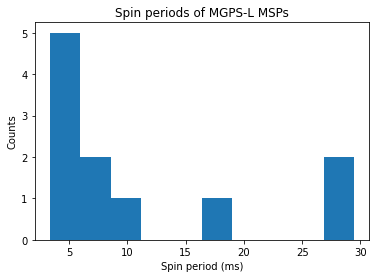

In [232]:
plt.hist(1000*np.array(mgps_msp_periods,dtype=float))
plt.xlabel('Spin period (ms)')
plt.ylabel('Counts')
plt.title('Spin periods of MGPS-L MSPs')

Text(0.5, 1.0, 'Spin periods of MGPS-L Canonical psrs')

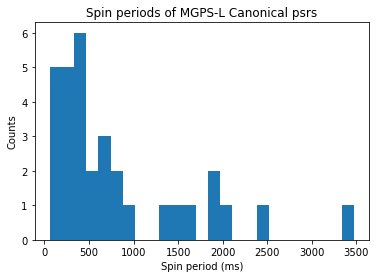

In [233]:
plt.hist(1000*np.array(mgps_canonical_periods,dtype=float),bins=25)
plt.xlabel('Spin period (ms)')
plt.ylabel('Counts')
plt.title('Spin periods of MGPS-L Canonical psrs')

Can actual and simulation numbers be derived from the same distribution?

In [253]:
from scipy.stats import ks_2samp
msp_actual = 1000*np.array(mgps_msp_periods,dtype=float)
msp_sim = np.array(msp_periods,dtype=float)

print("p-value for MSP spin periods: {}".format(ks_2samp(msp_actual, msp_sim)[1]))

P-value for MSP spin periods:0.45034552876464284


In [254]:
msp_dm_actual = np.array(mgps_msp_dms,dtype=float)
msp_dm_sim = np.array(msp_dms,dtype=float)

print("p-value for MSP DMs: {}".format(ks_2samp(msp_dm_actual, msp_dm_sim)[1]))

P-value for MSP DMs: 0.017404176230557233


In [256]:
canonical_actual = 1000*np.array(mgps_canonical_periods,dtype=float)
canonical_sim = np.array(spin_periods,dtype=float)

print("p-value for canonical spin periods: {}".format(ks_2samp(canonical_actual, canonical_sim)[1]))

p-value for canonical spin periods: 0.5130275837633171


In [258]:
canonical_dm_actual = np.array(mgps_canonical_dms,dtype=float)
canonical_dm_sim = np.array(dms,dtype=float)

print("p-value for canonical DMs: {}".format(ks_2samp(canonical_dm_actual, canonical_dm_sim)[1]))

p-value for canonical DMs: 0.05127323554247143


(array([7., 5., 7., 4., 1., 4., 1., 1., 1., 1.]),
 array([  33.078 ,  150.0702,  267.0624,  384.0546,  501.0468,  618.039 ,
         735.0312,  852.0234,  969.0156, 1086.0078, 1203.    ]),
 <BarContainer object of 10 artists>)

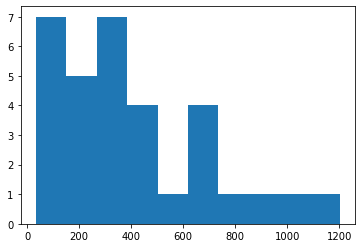

In [260]:
plt.hist(canonical_dm_actual)

(array([1.707e+03, 5.414e+03, 5.193e+03, 2.283e+03, 7.980e+02, 2.240e+02,
        5.200e+01, 1.500e+01, 2.000e+00, 5.000e+00]),
 array([   3.54059529,  133.43653576,  263.33247623,  393.22841671,
         523.12435718,  653.02029765,  782.91623812,  912.81217859,
        1042.70811906, 1172.60405953, 1302.5       ]),
 <BarContainer object of 10 artists>)

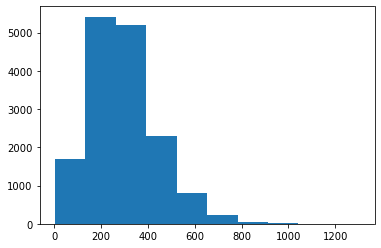

In [261]:
plt.hist(canonical_dm_sim)

In [262]:
msp_actual

array([ 3.35892  ,  4.0875508,  4.277    ,  4.7383374,  5.67     ,
        6.87     ,  7.718008 ,  8.70214  , 16.6572   , 28.71     ,
       29.46     ])